In [158]:
#https://github.com/cs109/2015lab2/blob/master/Lab2.ipynb

import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")
page = req.text
soup = BeautifulSoup(page, 'html.parser')

In [4]:
print(soup.title)
len(soup.find_all('p'))


<title>Harvard University - Wikipedia</title>


72

In [6]:
soup.table["class"]

['infobox', 'vcard']

In [9]:
all_table_classes = [t["class"] for t in soup.find_all("table") if t.get("class")]
all_table_classes

[['infobox', 'vcard'],
 ['toccolours'],
 ['plainlinks', 'metadata', 'ambox', 'mbox-small-left', 'ambox-content'],
 ['infobox'],
 ['wikitable'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'hlist', 'collapsible', 'autocollapse', 'navbox

In [11]:
table_html = str(soup.find("table", "wikitable"))
from IPython.core.display import HTML

HTML(table_html)

,Undergraduate,Graduate and Professional,U.S. Census
Asian/Pacific Islander,17%,11%,5%
Black/Non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed Race/Other,10%,8%,9%
International students,11%,27%,N/A


In [113]:
rows = [row for row in soup.find("table", "wikitable").find_all("tr")]
rem_nl = lambda x: x.replace("\n", " ")
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()]
indexes = [row.find("th").get_text() for row in rows[1:]]


In [100]:
to_num = lambda s: s[-1] == "%" and int(s[:-1]) or None
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all("td")]
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

In [118]:
stacked_values = zip(*[values[i::3] for i in range(len(cols))])
stacked_values


In [160]:
data_dict = [{col: val for col, val in zip(columns, value_groups)} for value_groups in stacked_values]
data_dicts

[{'Graduate and Professional': 11, 'U.S. Census': 5, 'Undergraduate': 17},
 {'Graduate and Professional': 4, 'U.S. Census': 12, 'Undergraduate': 6},
 {'Graduate and Professional': 5, 'U.S. Census': 16, 'Undergraduate': 9},
 {'Graduate and Professional': 43, 'U.S. Census': 64, 'Undergraduate': 46},
 {'Graduate and Professional': 8, 'U.S. Census': 9, 'Undergraduate': 10},
 {'Graduate and Professional': 27, 'U.S. Census': None, 'Undergraduate': 11}]

In [123]:
import pandas as pd
df = pd.DataFrame(data_dicts, index=indexes)
df

,Graduate and Professional,U.S. Census,Undergraduate
Asian/Pacific Islander,11,5.0,17
Black/Non-Hispanic,4,12.0,6
Hispanics of any race,5,16.0,9
White/non-Hispanic,43,64.0,46
Mixed Race/Other,8,9.0,10
International students,27,NaN,11


In [125]:
df_clean = df.fillna(0).astype(int)

In [136]:
import numpy as np
df_clean.values

print(df_clean.Undergraduate.mean())
print(df_clean["Undergraduate"]["International students"])
print(df_clean.loc["Asian/Pacific Islander"])
df_clean.mean()

16.5
11
Graduate and Professional    11
U.S. Census                   5
Undergraduate                17
Name: Asian/Pacific Islander, dtype: int64


Graduate and Professional    16.333333
U.S. Census                  17.666667
Undergraduate                16.500000
dtype: float64

In [142]:
df_flat = df_clean.stack().reset_index()
df_flat.columns = ["race", "source", "percentage"]
df_flat

,race,source,percentage
0,Asian/Pacific Islander,Graduate and Professional,11
1,Asian/Pacific Islander,U.S. Census,5
2,Asian/Pacific Islander,Undergraduate,17
3,Black/Non-Hispanic,Graduate and Professional,4
4,Black/Non-Hispanic,U.S. Census,12
5,Black/Non-Hispanic,Undergraduate,6
6,Hispanics of any race,Graduate and Professional,5
7,Hispanics of any race,U.S. Census,16
8,Hispanics of any race,Undergraduate,9
9,White/non-Hispanic,Graduate and Professional,43


In [153]:
grouped = df_flat.groupby("race")
grouped

In [154]:
for group, percentage in grouped:
    print(group)
    print(percentage)

Asian/Pacific Islander
                     race                     source  percentage
0  Asian/Pacific Islander  Graduate and Professional          11
1  Asian/Pacific Islander                U.S. Census           5
2  Asian/Pacific Islander              Undergraduate          17
Black/Non-Hispanic
                 race                     source  percentage
3  Black/Non-Hispanic  Graduate and Professional           4
4  Black/Non-Hispanic                U.S. Census          12
5  Black/Non-Hispanic              Undergraduate           6
Hispanics of any race
                    race                     source  percentage
6  Hispanics of any race  Graduate and Professional           5
7  Hispanics of any race                U.S. Census          16
8  Hispanics of any race              Undergraduate           9
International students
                      race                     source  percentage
15  International students  Graduate and Professional          27
16  International stu

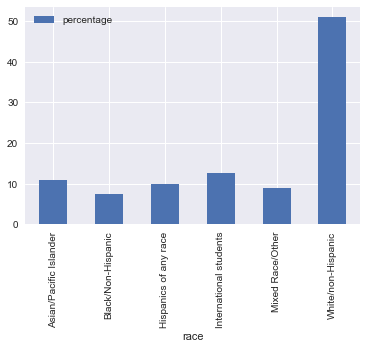

In [159]:
mean = grouped.mean()
mean.plot(kind="bar")